<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Computer-Vision/blob/master/Water_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

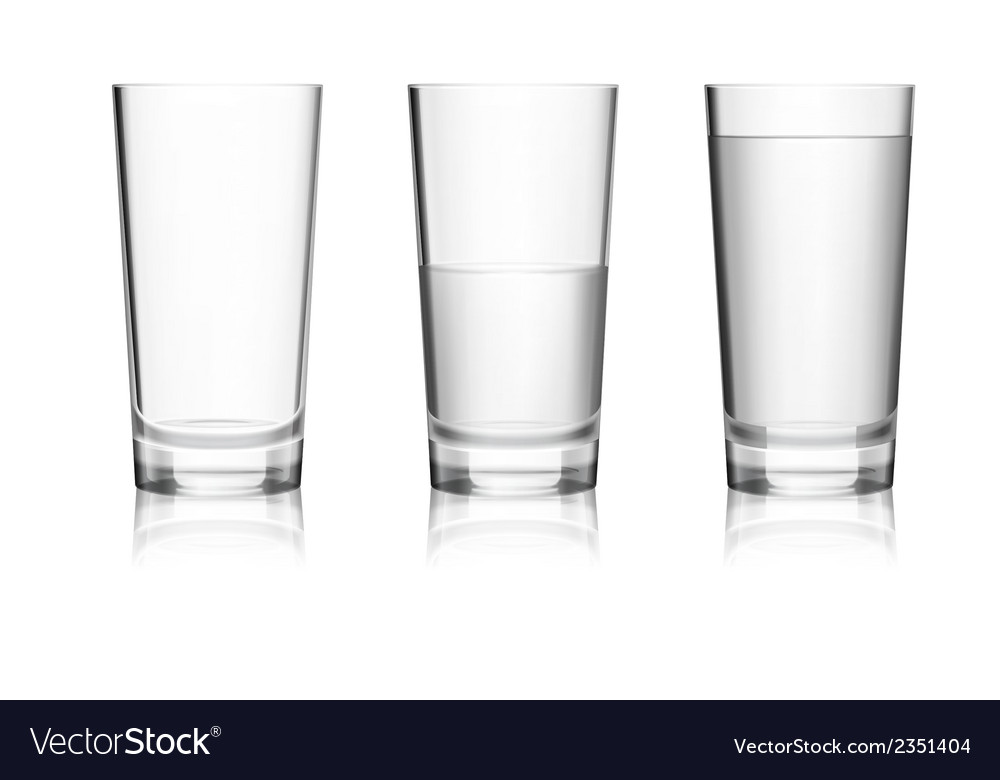

In [4]:
glasses=cv2.imread('/content/glasses3.jpg')
cv2_imshow(glasses)


### We will now crop the images for setting reference and will crop the images for getting 3 images of glass with different level.

In [5]:
glasses.shape

(780, 1000, 3)

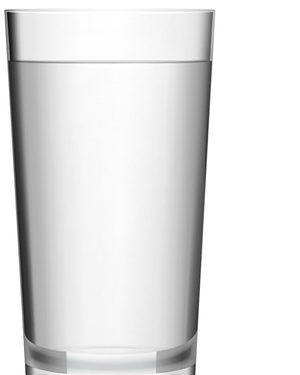

In [6]:
full_glass= glasses[75:450,700:]
cv2_imshow(full_glass)


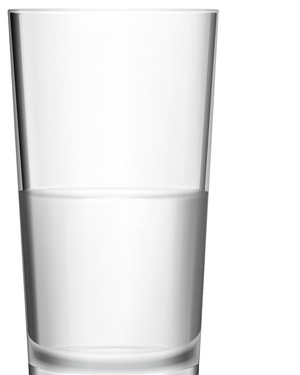

In [7]:
half_glass= glasses[75:450,400:700]
cv2_imshow(half_glass)

In [96]:
full_glass.shape, half_glass.shape

((375, 300, 3), (375, 300, 3))

#### So the shape of all the glasses is same.

In [0]:
def gray(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def draw_rectangle(image,  left_top_coordinate = (20, 55), right_bottom_coordinate=(200,100)):
  return cv2.rectangle(image.copy(), left_top_coordinate, right_bottom_coordinate, (0,0,255), 1)


def crop_the_area(image, left_top_coordinate = (20, 55), right_bottom_coordinate=(200,100)):
  return image[ left_top_coordinate[1]:right_bottom_coordinate[1], left_top_coordinate[0]:+right_bottom_coordinate[0]]


def template_matching(image, template):
  result=cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
  min_val, max_val, min_loc, max_loc= cv2.minMaxLoc(result)
  return max_val


def histogram(image_gray):
  
  hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
  
  # uncomment to get the graph
  
  #plt.figure()
  #plt.title("Grayscale Histogram")
  #plt.xlabel("Bins")
  #plt.ylabel("# of Pixels")
  #plt.plot(hist)
  #plt.xlim([0, 256])
  
  return hist


def compare_hist(image, template):
  gray_=cv2.compareHist(histogram(image),  histogram(template), cv2.HISTCMP_CORREL)
  return gray_



def main_execution(image, template, left_top_coordinate = (20, 55), right_bottom_coordinate=(200,100)):
  
  
    image_gray=gray(image)
    template_gray= gray(template)
    
    
    image_=draw_rectangle(image, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(image_)
    template_=draw_rectangle(template, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(template_)

    
    print('\n')
    
    image_crop= crop_the_area(image_gray, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(image_crop)
    print('\n')
    template_crop= crop_the_area(template_gray, left_top_coordinate, right_bottom_coordinate)
    cv2_imshow(template_crop)
    
    template_matching_accuracy= template_matching(image_crop, template_crop)
    print(' Accuracy(Template_Matching): ', template_matching_accuracy)

    
    hist_gray_accuracy=compare_hist(image_crop, template_crop)
    print(' Accuracy(GrayScale Histogram Matching): ',hist_gray_accuracy)
    
    average_accuracy= (hist_gray_accuracy+template_matching_accuracy)/2
    
    print (' Average Accuracy: ', average_accuracy)
    
    print ('Pass') if average_accuracy > 95.0 else print('Fail')
    
    
 
    

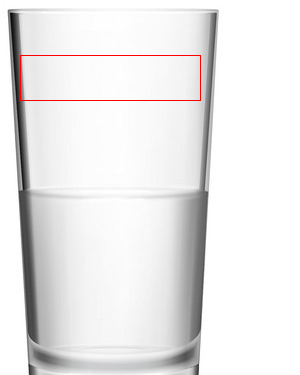

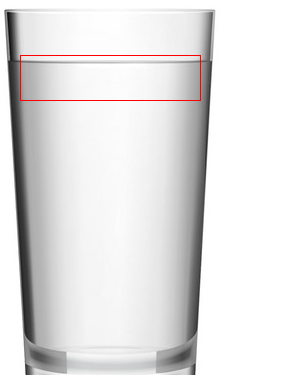

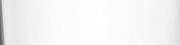

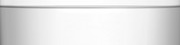

 Accuracy(Template_Matching):  0.6559739708900452
 Accuracy(GrayScale Histogram Matching):  0.8097442078094282
 Average Accuracy:  0.7328590893497366
Fail


In [184]:
main_execution(half_glass, full_glass)

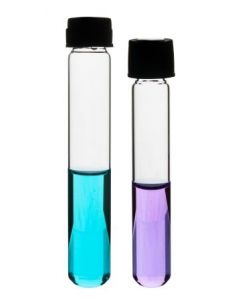

(300, 240, 3)

In [153]:
test_tubes=cv2.imread('/content/test_tube.jpg')
cv2_imshow(test_tubes)
test_tubes.shape

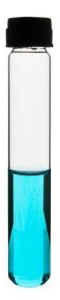

(300, 60, 3)


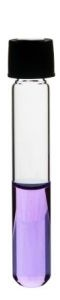

(300, 60, 3)

In [154]:
tube1=test_tubes[:,60:120]
cv2_imshow(tube1)
print(tube1.shape)

tube2=test_tubes[:,120:180]
cv2_imshow(tube2)
tube2.shape

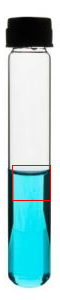

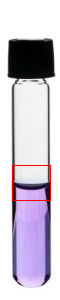

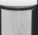

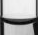

 Accuracy(Template_Matching):  0.2691419720649719
 Accuracy(GrayScale Histogram Matching):  0.3370740689736614
 Average Accuracy:  0.3031080205193166
Fail


In [185]:
main_execution(tube1, tube2, (12,165), (50,200))

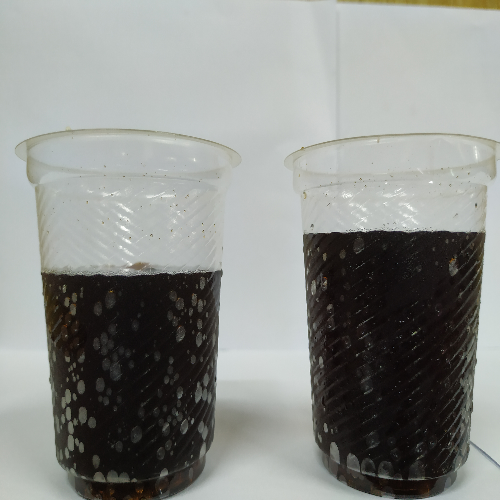

(500, 500, 3)

In [187]:
coke=cv2.imread('/content/coke.jpg')
coke=cv2.resize(coke, (500,500))
cv2_imshow(coke)
coke.shape

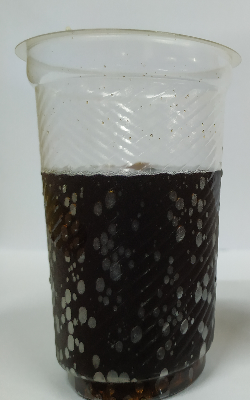

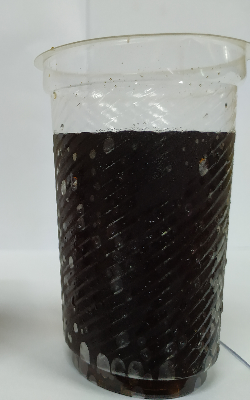

In [194]:
half= coke.copy()[100:,:250]
cv2_imshow(half)

full=coke.copy()[100:,250:]
cv2_imshow(full)

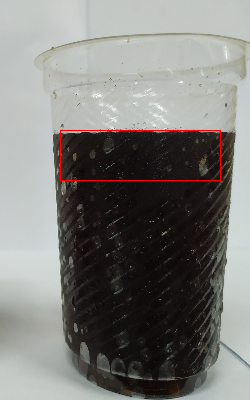

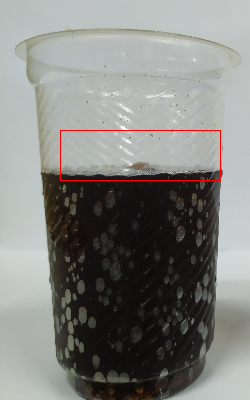

In [205]:
cv2_imshow(cv2.rectangle(full.copy(), (60, 130), (220,180), (0,0,255), 1))

cv2_imshow(cv2.rectangle(half.copy(), (60, 130), (220,180), (0,0,255), 1))

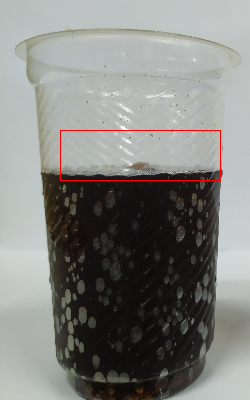

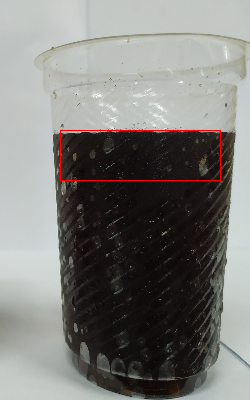

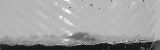

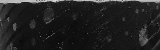

 Accuracy(Template_Matching):  0.11890796571969986
 Accuracy(GrayScale Histogram Matching):  0.019667378609561133
 Average Accuracy:  0.0692876721646305
Fail


In [206]:
main_execution(half.copy(), full.copy(), (60,130), (220,180))

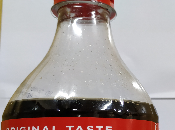

(130, 175, 3)


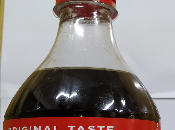

In [229]:
test=cv2.imread('/content/IMG_20191009_124710.jpg')
test=cv2.resize(test, (300,300))[20:150, 5:180]
cv2_imshow(test)

print(test.shape)

full_coke=cv2.imread('/content/IMG_20191009_124731.jpg')[:,:]
full_coke=cv2.resize(full_coke, (300,300))[20:150, 5:180]
cv2_imshow(full_coke)


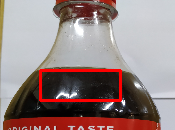

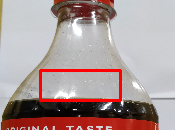

In [248]:
cv2_imshow(cv2.rectangle(full_coke.copy(), (40, 70), (120,100), (0,0,255), 2))
cv2_imshow(cv2.rectangle(test.copy(), (40, 70), (120,100), (0,0,255), 2))

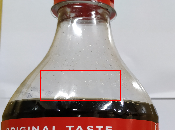

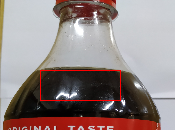

 Accuracy(Template_Matching):  0.4846284091472626
 Accuracy(GrayScale Histogram Matching):  -0.10123340243783809
 Average Accuracy:  0.19169750335471225
Fail


In [249]:
main_execution(test.copy(), full_coke.copy(), (40,70), (120,100))